In [11]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction
)

import matplotlib.pyplot as plt
import cv2
import numpy as np
from typing import Dict
from PIL import Image
from pathlib import Path

In [12]:
# load models
refine_net = load_refinenet_model(cuda=False)
craft_net = load_craftnet_model(cuda=False)

/home/sge/Documents/Sergio's OV [Debian]/Esade MiBA/TFM/albcovis-project/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sge/Documents/Sergio's OV [Debian]/Esade MiBA/TFM/albcovis-project/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [13]:
def plot_craft_detections(img_path: str, result: Dict, show=True, save_path=None):
    """
    Plot detected text boxes on the original image.

    Args:
        result (dict): Output from `get_prediction()`
        show (bool): Whether to display the plot
        save_path (str): If provided, saves the result to this path
    """
    image = Image.open(img_path)
    image = np.array(image)
    boxes = result["boxes"]

    img_copy = image.copy()
    for box in boxes:
        box = box.astype(np.int32).reshape((-1, 1, 2))
        cv2.polylines(img_copy, [box], isClosed=True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title("CRAFT: Detected Text Regions")
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    if show:
        plt.show()


def plot_craft_with_heatmap(img_path: str, result: Dict, heatmap_type="text_score_heatmap", alpha=0.4, show=True, save_path=None):
    """
    Plot text detections with heatmap overlaid on the original image.

    Args:
        result (dict): Output from `get_prediction()`
        heatmap_type (str): 'text_score_heatmap' or 'link_score_heatmap'
        alpha (float): Transparency of heatmap overlay
        show (bool): Whether to display the plot
        save_path (str): If provided, saves the result to this path
    """
    image = Image.open(img_path)
    image = np.array(image)
    boxes = result["boxes"]
    heatmap = result["heatmaps"][heatmap_type]

    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    overlay = cv2.addWeighted(image, 1 - alpha, heatmap_resized, alpha, 0)

    # Draw boxes
    for box in boxes:
        box = box.astype(np.int32).reshape((-1, 1, 2))
        cv2.polylines(overlay, [box], isClosed=True, color=(0, 255, 0), thickness=2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(f"CRAFT Detection with {heatmap_type}")
    plt.axis("off")

    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    if show:
        plt.show()


In [14]:
# set image path and export folder directory
img_path = '../data/source/images/1497325512-large.jpg' # can be filepath, PIL image or numpy array

# read image
image = read_image(img_path)

# perform prediction
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.5,
    link_threshold=0.1,
    low_text=0.4,
    cuda=False,
    long_size=500
)

prediction_result

{'boxes': array([[[ 46.11032 ,   0.      ],
         [434.5441  ,  12.583908],
         [433.4584  ,  43.34559 ],
         [ 45.024628,  29.636162]]], dtype=float32),
 'boxes_as_ratios': array([[[0.09222064, 0.        ],
         [0.8690882 , 0.02516782],
         [0.86691681, 0.08669118],
         [0.09004926, 0.05927232]]]),
 'polys': array([array([[ 46.11032 ,   0.      ],
               [434.5441  ,  12.583908],
               [433.4584  ,  43.34559 ],
               [ 45.024628,  29.636162]], dtype=float32)], dtype=object),
 'polys_as_ratios': array([[[0.09222064, 0.        ],
         [0.8690882 , 0.02516782],
         [0.86691681, 0.08669118],
         [0.09004926, 0.05927232]]]),
 'heatmaps': {'text_score_heatmap': array([[[140,   0,   0],
          [144,   0,   0],
          [128,   0,   0],
          ...,
          [128,   0,   0],
          [136,   0,   0],
          [128,   0,   0]],
  
         [[132,   0,   0],
          [128,   0,   0],
          [128,   0,   0],
       

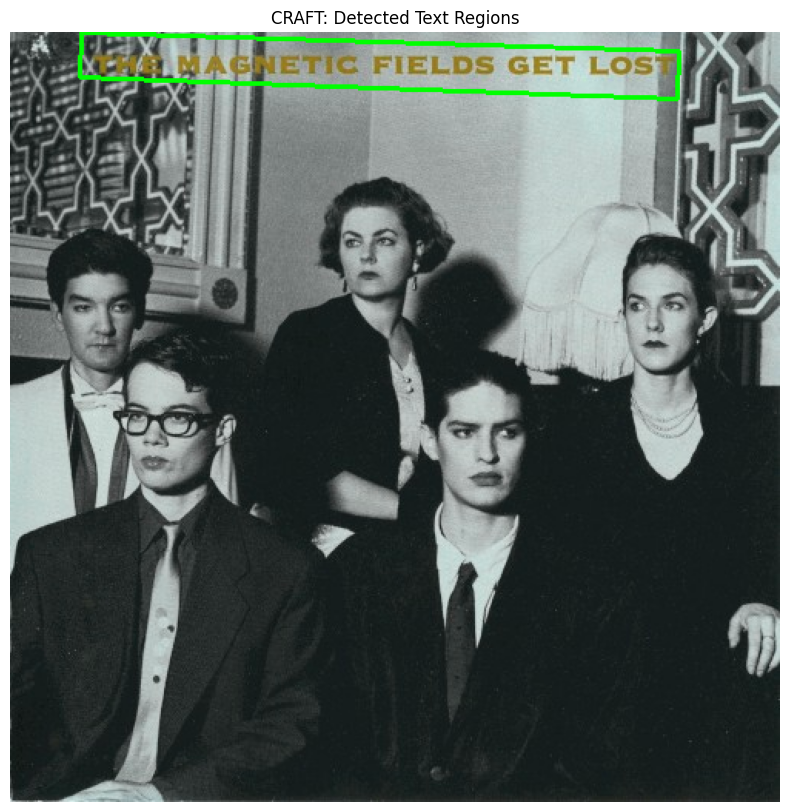

In [15]:
plot_craft_detections(img_path, prediction_result)

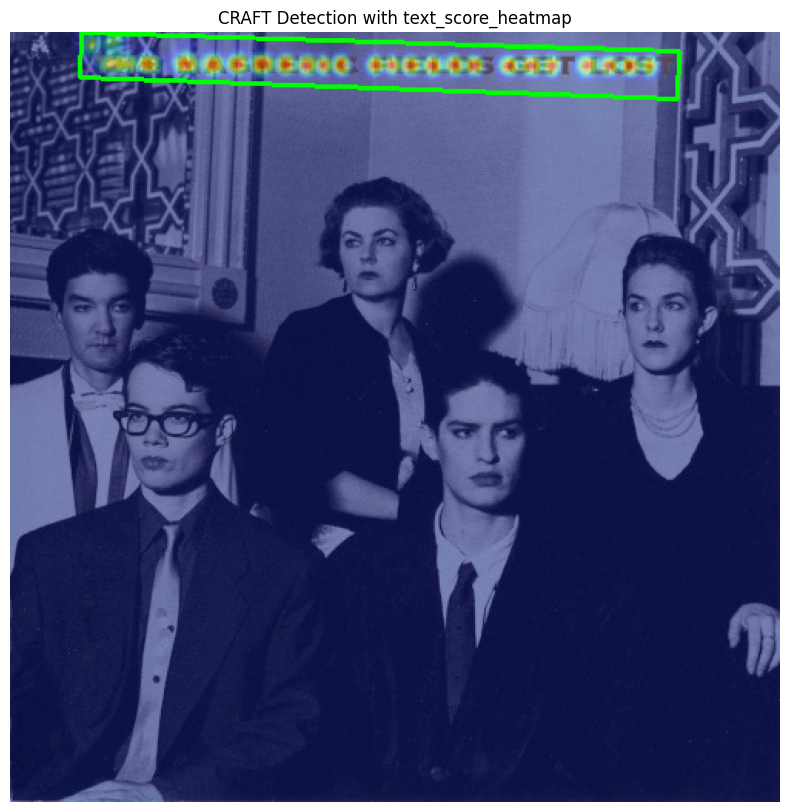

In [16]:
plot_craft_with_heatmap(img_path, prediction_result)

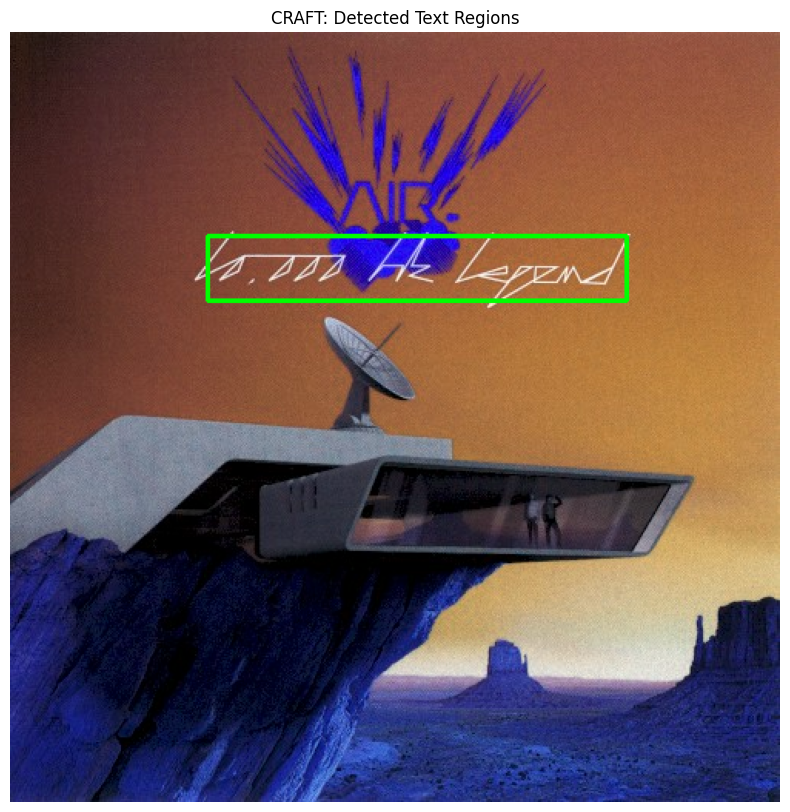

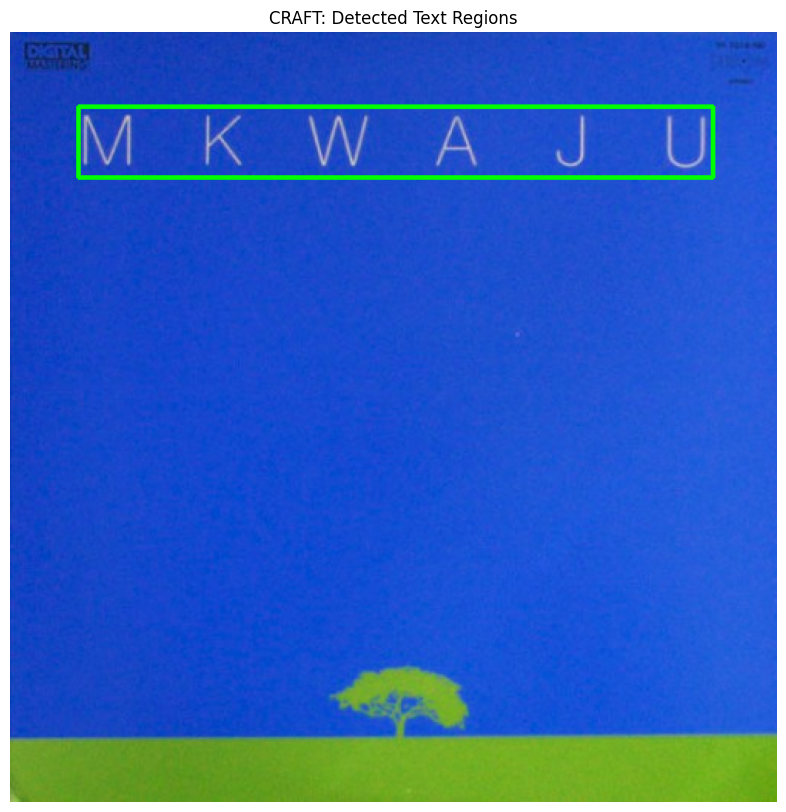

In [17]:
dir = Path("../data/source/images")
imgs_filenames = [
    "40654268451-px_500.jpg", # 10000Hz Legend
    "14688551481-large.jpg", # MKWAJU
    "9845751214-large.jpg", # Gotan Project
    "22280981189-px_500.jpg", # Dick's Picks Volume Four
    "11446625684-large.jpg", # Carnaval
    "24818281700-px_500.jpg", # Tiger Army Retrofuture
    "39341710398-px_500.jpg", # Xerrox
    "3880053972-px_500.jpg", # Unknown Pleasures
    "24961543145-px_500.jpg", # Hats
    "23776122656-px_500.jpg", # Tre
    "1766939079-large.jpg", # Richest man in babylon
    "17519297659-px_500.jpg", # Amor amarillo
    "4924862361-large.jpg", # The White Album
    "30944412549-px_500.jpg" # Donda
    ]

for filename in imgs_filenames[:2]:
    path = dir / filename
    image = Image.open(path)
    image = np.array(image)
    # image = read_image(str(path))

    # perform prediction
    prediction_result = get_prediction(
        image=image,
        craft_net=craft_net,
        refine_net=refine_net,
        text_threshold=0.5,
        link_threshold=0.1, #0.4
        low_text=0.4,
        cuda=False,
        long_size=500
    )

    plot_craft_detections(path, prediction_result)

In [24]:
import pandas as pd

df = pd.read_csv("../data/processed/craft_grid/metrics_summary.csv")
c = "AP@0.10"
df[["config","mean_time", c]].sort_values(c, ascending=False).head(15)

,config,mean_time,AP@0.10
35,text=0.5_link=0.1_low=0.4_size=500,1.237927,0.495030
23,text=0.7_link=0.1_low=0.4_size=500,1.465603,0.483543
21,text=0.7_link=0.1_low=0.4_size=1280,8.783884,0.480443
18,text=0.7_link=0.2_low=0.4_size=1280,10.862677,0.473058
6,text=0.9_link=0.2_low=0.4_size=1280,9.067481,0.471740
9,text=0.9_link=0.1_low=0.4_size=1280,9.062258,0.465117
22,text=0.7_link=0.1_low=0.4_size=800,3.521894,0.464209
34,text=0.5_link=0.1_low=0.4_size=800,3.067011,0.463204
47,text=0.3_link=0.1_low=0.4_size=500,1.317974,0.458086
30,text=0.5_link=0.2_low=0.4_size=1280,9.363951,0.448816


In [25]:
import pandas as pd

df = pd.read_csv("../data/processed/craft_grid/metrics_summary.csv")
c = "AR@0.10"
df[["config","mean_time", c]].sort_values(c, ascending=False).head(15)

,config,mean_time,AR@0.10
35,text=0.5_link=0.1_low=0.4_size=500,1.237927,0.532143
47,text=0.3_link=0.1_low=0.4_size=500,1.317974,0.530357
42,text=0.3_link=0.2_low=0.4_size=1280,9.317897,0.523214
30,text=0.5_link=0.2_low=0.4_size=1280,9.363951,0.523214
33,text=0.5_link=0.1_low=0.4_size=1280,8.284301,0.519643
45,text=0.3_link=0.1_low=0.4_size=1280,8.564361,0.517857
18,text=0.7_link=0.2_low=0.4_size=1280,10.862677,0.516071
21,text=0.7_link=0.1_low=0.4_size=1280,8.783884,0.516071
23,text=0.7_link=0.1_low=0.4_size=500,1.465603,0.508929
34,text=0.5_link=0.1_low=0.4_size=800,3.067011,0.505357
